In [3]:
###########################################################
# Regression with statsmodel
#Facebook advertiding dataset
###########################################################
#The flow of online advertising is that you pay money to Facebook, 
#who show your advert to Facebook users. 
#If a person sees the advert, it's called an impression. 
#Then some people who see the advert will click on it.

import pandas as pd 

ad_conversion = pd.read_csv("datasets/ad_conversion.csv")
display(ad_conversion.head(5))


,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


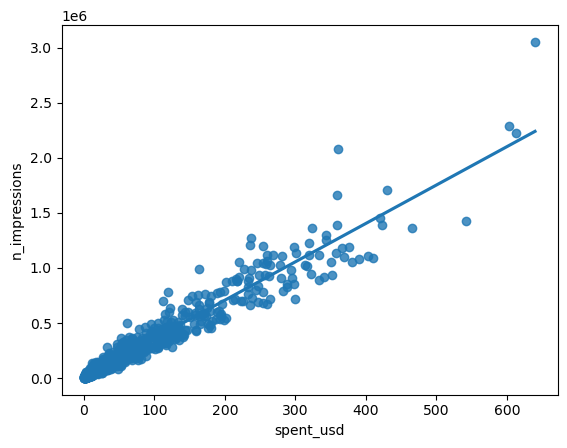

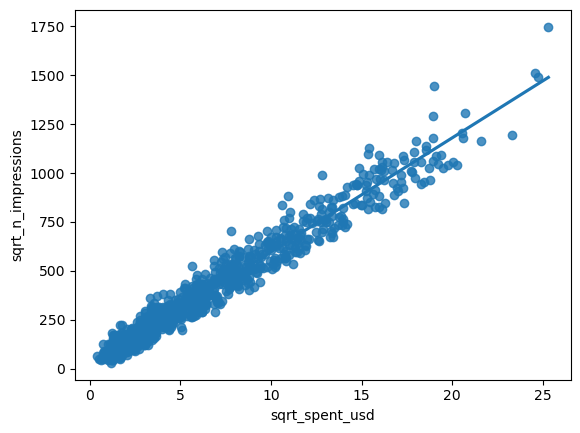

In [6]:
#Let's look at impressions versus spend.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.regplot(x="spent_usd", y="n_impressions", data=ad_conversion, ci=None)
plt.show()
#the majority of the points are crammed into the bottom-left of the plot, 
#making it difficult to assess whether there is a good fit or not.

#by transforming both the variables with square roots, 
#the data are more spread out throughout the plot, and the points follow the line fairly closely. 
#Square roots are a common transformation when your data has a right-skewed distribution.
ad_conversion["sqrt_spent_usd"] = np.sqrt(ad_conversion["spent_usd"])
ad_conversion["sqrt_n_impressions"] = np.sqrt(ad_conversion["n_impressions"])
sns.regplot(x="sqrt_spent_usd", y="sqrt_n_impressions", data=ad_conversion, ci=None)
plt.show()


In [12]:
#modeling and predicting
from statsmodels.formula.api import ols
mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd", data=ad_conversion).fit()
explanatory_data = pd.DataFrame({"sqrt_spent_usd":np.sqrt(np.arange(0,601,100)), "spent_usd":np.arange(0,601,100)})
prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_ad.predict(explanatory_data),
                                          n_impressions= mdl_ad.predict(explanatory_data)**2)
print(prediction_data)





   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


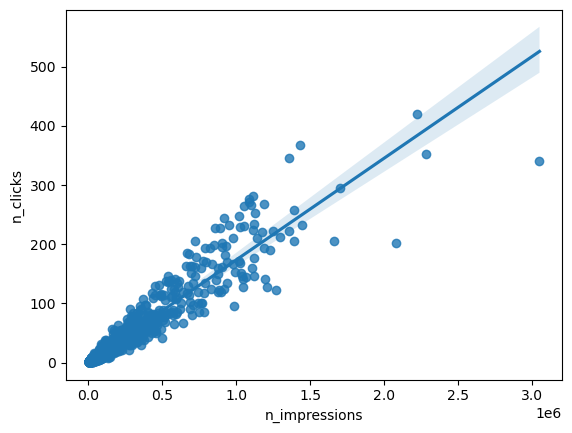

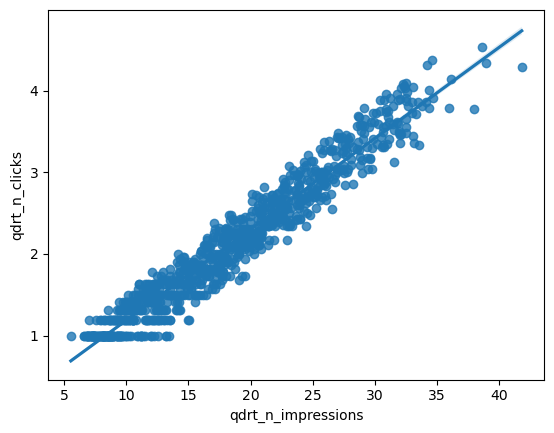

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [18]:
##########################################
#Transforming the response variable too
##########################################
plt.figure()
# Plot using the transformed variables
sns.regplot(x="n_impressions",y="n_clicks", data=ad_conversion)
plt.show()


# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"]**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] **0.25

plt.figure()
# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions",y="qdrt_n_clicks", data=ad_conversion)
plt.show()

#run a linear regression
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

print(prediction_data)

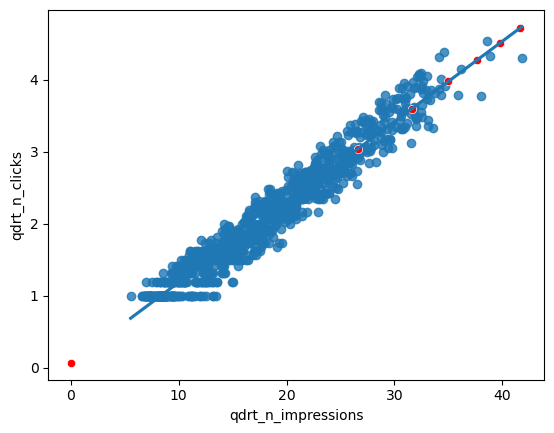

In [21]:
########################
#Back transformation
########################
#Since the response variable has been transformed, 
#you'll now need to back-transform the predictions to correctly interpret your results.

#you transformed the response variable, ran a regression, and made predictions. 
#In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()

#The back-transformed predictions nicely follow the trend line 
#and allow to make more accurate predictions.


In [24]:
##############################################################################
# Coefficient of determination
#measure of how well the linear regression line fits the observed values
##############################################################################
#Two models are available: 
#mdl_click_vs_impression_orig models n_clicks versus n_impressions. 
#mdl_click_vs_impression_trans is the transformed model.
#It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

# Print a summary of mdl_click_vs_impression_orig
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()
print(mdl_click_vs_impression_orig.summary())
# Print a summary of mdl_click_vs_impression_trans
mdl_click_vs_impression_trans = mdl_click_vs_impression
print(mdl_click_vs_impression_trans.summary())

# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)
# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

#r-squared=0.89
#The number of impressions(x) explains 89% of the variability in the number of clicks(y)
#The transformed model has a higher coefficient of determination than the original model, 
#suggesting that it gives a better fit to the data.


                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:57:25   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [25]:
##################################################
#Residual standard error
#measure of the typical size of the residuals
##################################################
#measure of how wrong you can expect predictions to be. 
#Smaller numbers are better, with zero being a perfect fit to the data.

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid
# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid
# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

#mdl_click_vs_impression_orig has an RSE of about 20
#the typical difference between obseved number of clicks(y)
#and predicted number of clicks is 20

#Which model does the RSE suggest gives more accurate predictions? 
#The transformed model with a smaller RSE

#RSE is a measure of accuracy for regression models. 
#It even works on other other statistical model types like regression trees, 
#so you can compare accuracy across different classes of models.


RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


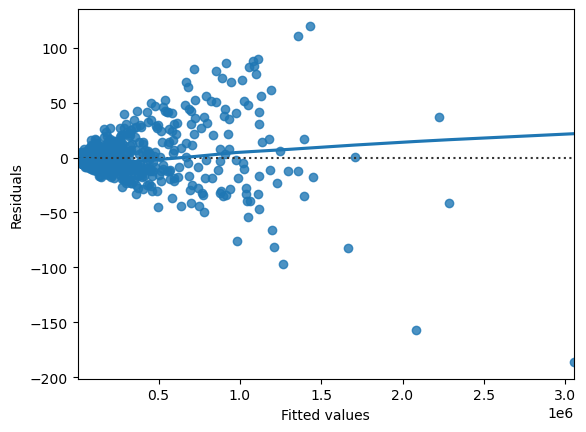

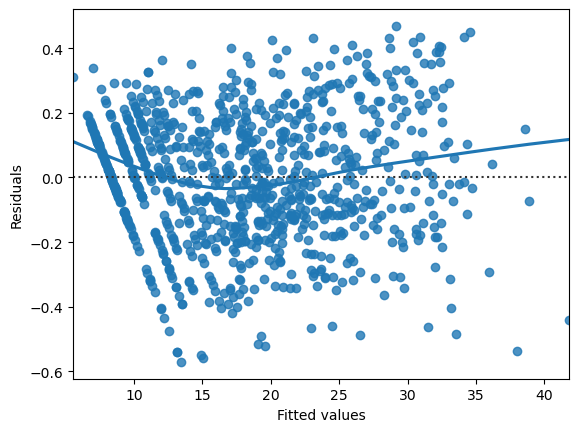

In [32]:
####################################################################
#diagnostic plots 
#residuals versus fitted values for two models
####################################################################
#Original model (n_clicks versus n_impressions):
sns.residplot(x="n_impressions", y="n_clicks", data=ad_conversion , lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
#plt.xlim(0, 3e6)
#plt.ylim(-200, 150)
plt.show()


#Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):
sns.residplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion , lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

#Look at the numbers on the y-axis scales and 
#how well the trend lines follow the line.
#The residuals track the y=0 line more closely in the transformed model compared to the original model
#indicating that the tranformed model is a better fit

#in a good model, the residuals should have a trend line close to zero.


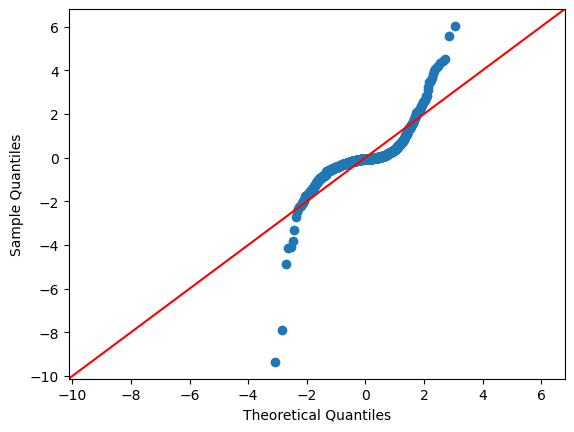

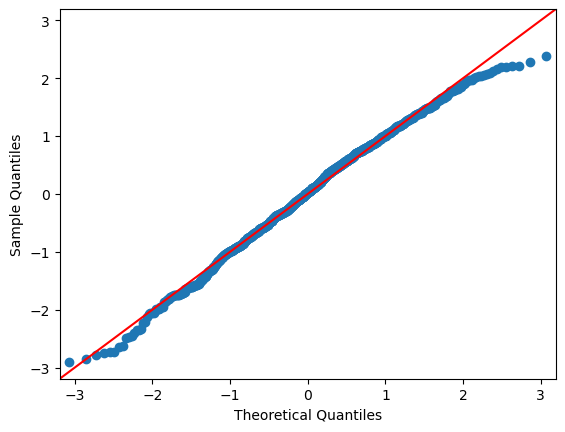

In [35]:
#############################
#diagnostic plots 
#Q-Q plot of residuals
#############################
from statsmodels.api import qqplot

#Original model (n_clicks versus n_impressions):
qqplot(data=mdl_click_vs_impression_orig.resid , fit=True, line="45")
plt.show()

#Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):
qqplot(data=mdl_click_vs_impression_trans.resid , fit=True, line="45")
plt.show()

#Look at how well the points track the "normality" line. 
#The residuals track the "normality" line more closely in the transformed model compared to the original model, 
#indicating that the transformed model is a better fit for the data.


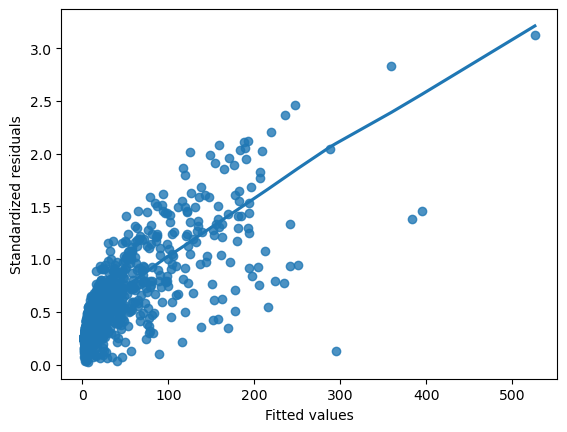

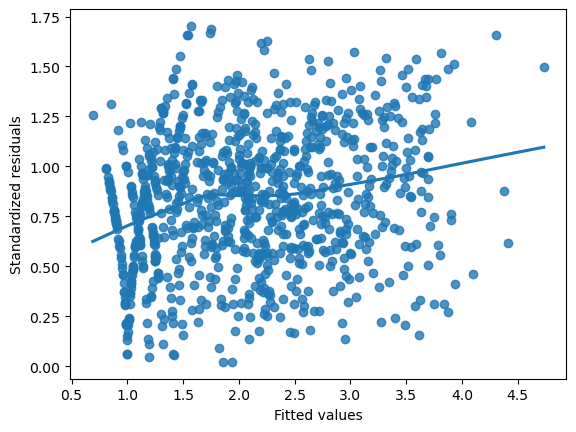

In [36]:
#############################
#diagnostic plots 
#Scale-location plot 
#############################
#show the size of residuals versus fitted values.

#Original model (n_clicks versus n_impressions):
#extract the normalized residuals from the models
mdl_residuals = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
#taking the absolute values of standardized residuals
mdl_residuals_std = np.sqrt(np.abs(mdl_residuals))
sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues, y=mdl_residuals_std, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt Abs Standardized residuals")
plt.show()

#Transformed model (n_clicks ** 0.25 versus n_impressions ** 0.25):
#extract the normalized residuals from the models
mdl_residuals = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
#taking the absolute values of standardized residuals
mdl_residuals_std = np.sqrt(np.abs(mdl_residuals))
sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues, y=mdl_residuals_std, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt Abs Standardized residuals")
plt.show()

#Look at the numbers on the y-axis and the slope of the trend line. 
#In a good model, the size of the residuals shouldn't change much as the fitted values change.
